In [1]:
import sys
sys.path.append('..')

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd

results_dir = Path("../results")
data = np.load(results_dir / "preds.npz")
labels = data["labels"]
preds = data["preds"]

# save for confusion matrix
data = {"Actual Label": labels, "Predicted Label": preds}
df = pd.DataFrame(data, columns=['Actual Label', 'Predicted Label'])
confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual Label'],
                               colnames=['Predicted Label'])

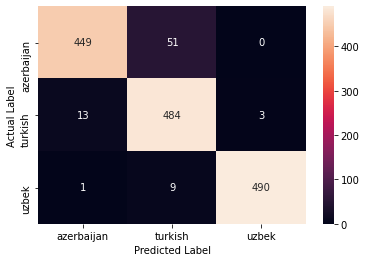

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix, annot=True,fmt = 'd')
plt.show()

In [4]:
misclassified_tr = []
misclassified_az = []
misclassified_uz = []
for idx, label in enumerate(labels):
    if label == preds[idx]:
        continue
    
    if label == "turkish": 
        misclassified_tr.append(idx)
    
    elif label == "azerbaijan":
        misclassified_az.append(idx)
        
    else:
        misclassified_uz.append(idx)

In [7]:
import os
from dataset import read_test_from_split

os.chdir("..")
X_test, y_test = read_test_from_split(42)

In [8]:
print("Misclassified Turkish samples")
for idx in misclassified_tr:
    print(idx)
    print(X_test[idx])
    print("Predicted as {}".format(preds[idx]))

Misclassified Turkish samples
18
["DAVUTOĞLU, MACARİSTAN'I ZİYARET EDECEK"]
Predicted as uzbek
32
['"ONU YUKARI SORUN"']
Predicted as azerbaijan
58
['İKİNCİ DURUŞMA']
Predicted as azerbaijan
80
['Diyelim ki; bu “şüpheliler” gerçekten suçlu...']
Predicted as azerbaijan
105
['Kimler yoktu ki gecede… İlk aklıma gelenler: Mine Soysal, Kerem Aktan, Turhan Günay, Osman Şahin, Necdet Neydim, Ayla Çınaroğlu, Sevim Ak, Gülten Dayıoğlu, Filiz İleri, Aydın İleri, Gülsüm Cengiz, Dursun Yağmur, Necati Güngör, Mustafa Delioğlu, Gülçin Alpöğe, Nur İçözü, Aysel Korkut, Simla Sunay, Selahattin Dilidüzgün, Yalvaç Ural, Ümit Kireççi, Ayfer Ünal…']
Predicted as azerbaijan
218
['20.00-20.25 Yöresel Sanatçılar']
Predicted as azerbaijan
221
['20 sürücüye taşıma sınırı üzerinde yük almak veya dingil ağırlıklarını aşacak şekilde yüklemekten,']
Predicted as azerbaijan
235
['Dünyanın tenha saatlerinde vakarla koyulurlar işlerine.']
Predicted as azerbaijan
240
['21 Mart 2008']
Predicted as uzbek
312
['Yeni tesis 

In [9]:
print("Misclassified Azerbaijani samples")
for idx in misclassified_az:
    print(idx)
    print(X_test[idx])
    print("Predicted as {}".format(preds[idx]))

Misclassified Azerbaijani samples
506
['Keçdi bir zaman, sordum özümdən:']
Predicted as turkish
508
['Qaliblərə fitva yazan.']
Predicted as turkish
513
['Hicran Hüseynova']
Predicted as turkish
521
['gedib çatmayan']
Predicted as turkish
523
['QANLI-QADALI İLLƏRDƏ']
Predicted as turkish
530
['Hakimlər sürpriz etmədilər']
Predicted as turkish
531
['“Hazır beton əllə hazırlanan betona nisbətən daha keyfiyyətlidir”']
Predicted as turkish
533
['Müəmmalı açıqlamalar']
Predicted as turkish
543
['1 kq. alma - 3 man.']
Predicted as turkish
561
['Musa Peyğəmbər deyir:']
Predicted as turkish
576
['Başçı da söz altında qalmır :']
Predicted as turkish
577
['gün batan zaman...']
Predicted as turkish
587
['Özü olmadığından']
Predicted as turkish
623
['– ... Gördün? – Nəhayət, Bəhram üzünü yan tutaraq Mübarizdən soruşmuşdu.']
Predicted as turkish
639
['Elman Cəfərli']
Predicted as turkish
641
['Əli Həsənov, Sumqayıt hadisələrinin “planlaşdırılmış“ olduğunu üç faktla əsaslandırdı:']
Predicted as turki

In [10]:
print("Misclassified Uzbek samples")
for idx in misclassified_uz:
    print(idx)
    print(X_test[idx])
    print("Predicted as {}".format(preds[idx]))

Misclassified Uzbek samples
1011
['Oqshom ranglariga singsin hikoya.']
Predicted as turkish
1055
["Farg'ona shahridagi 4-Bolalar"]
Predicted as azerbaijan
1270
["Kasimov Djuravoy Yuldashevich – “12-trest” aksiyadorlik jamiyatining 52-qurilish boshqarmasi montajchilar brigadasi boshlig'i, Toshkent shahri"]
Predicted as turkish
1286
['Jess King - universitet talabasi. Lagerga birinchi kelishi.']
Predicted as turkish
1301
['Abror QURBONOV,']
Predicted as turkish
1327
['Silviya Miteva, gimnastikachi (Bolgariya):']
Predicted as turkish
1427
['Dodini kimga aytishni bilmayotgan bu insonlarning yagona umidi tashqi dunyodan, xususan G’arbdan.']
Predicted as turkish
1428
["Tadbirda o'quvchi-yoshlarning badiiy-havaskorlik jamoalari ijrosida konsert dasturi namoyish etildi."]
Predicted as turkish
1439
['Taraqqiyotga yuz tutgan shahar']
Predicted as turkish
1491
['Suratda: ishchi Sharofiddin Jabborov.']
Predicted as turkish
